<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/basic_tecniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files




'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size


import warnings
warnings.filterwarnings('ignore')


In [0]:
import io, requests, zipfile

In [3]:
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s = requests.get(url, stream=True).content
data = pd.read_csv(io.BytesIO(s), compression = 'zip')

data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [5]:
from collections import Counter
targets = list(set(data['id']))
print('the targets are: ',targets)
target_freq = [dict(Counter(data['id']))[i] for i in targets]
print('the frequency of targets are: ',target_freq)
features = list (data.columns[1:])
print('the features are: ',features)


n_s = 10000
mini_data = data.sample(n_s, axis=0, random_state=0)
mini_data["target"] = mini_data['id'].apply(lambda x: targets.index(x))
mini_data.drop('id', axis=1, inplace=True)
mini_data.head()

the targets are:  [321, 211, 2212, -11]
the frequency of targets are:  [232471, 2806833, 1945849, 14847]
the features are:  ['p', 'theta', 'beta', 'nphe', 'ein', 'eout']


,p,theta,beta,nphe,ein,eout,target
3748577,1.230330,0.415613,0.985857,0,0.182147,0.058503,1
4555504,0.870680,0.864884,0.989180,0,0.000000,0.000000,1
2388454,1.320670,0.481086,0.806984,0,0.151431,0.115267,2
3738046,0.657969,0.500238,0.982778,0,0.034974,0.055161,1
1572731,1.756310,0.340558,0.993275,0,0.030030,0.167452,1


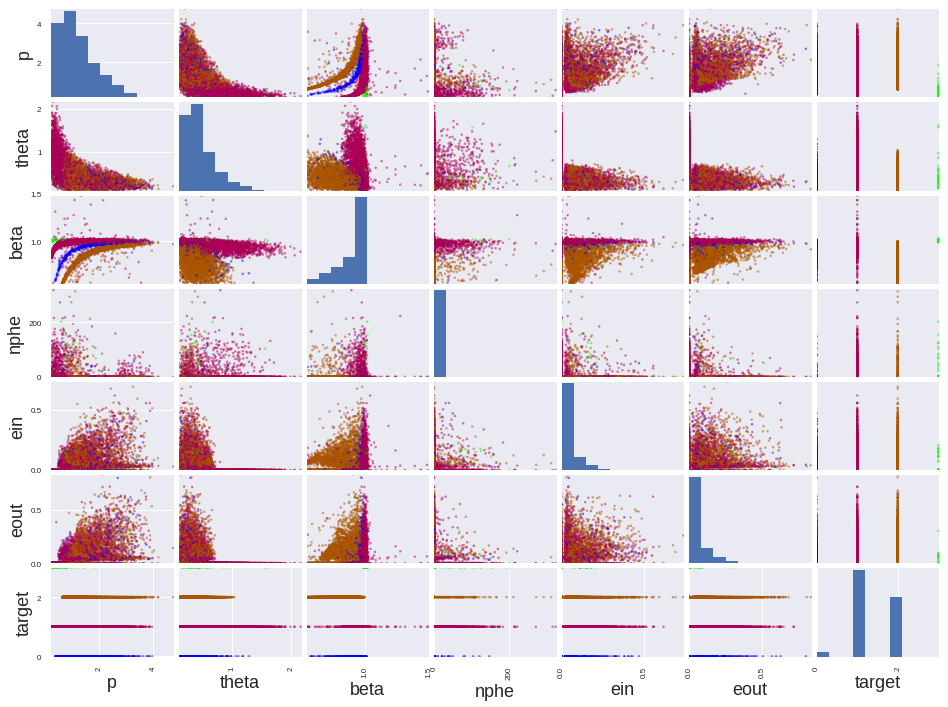

In [24]:
scatter = pd.scatter_matrix(mini_data,figsize=(16,12),c=mini_data['target'], cmap='brg')
                          #c=mini_data.target, cmap=plt.cm.Accent,
                           # figsize=(12,6), marker='o', s=50, hist_kwds={'bins':15})

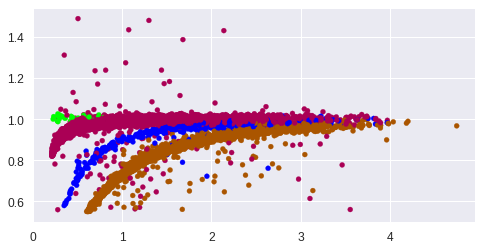

In [22]:
plt.scatter(mini_data['p'],mini_data['beta'],c=mini_data['target'],cmap='brg')

# Binary Classification
There are four classes in our data, but for the first part, let's just keep two classes. 
There are two ways we can do this. We can either ignore the two less frequent classes (one_vs_one) 
or we can can keep one class and categorize the data to "is" and "is not" in that class (one_vs_rest).
I do the first one, you try the second one. Pick a class with reasonable bias. 

In [33]:
targets = set(mini_data['target'])
print('the targets in data set is: ',targets)

ind_1 = 1
ind_2 = 2
bmd = mini_data[(mini_data['target']==ind_1) | (mini_data['target']==ind_2)]

the targets in data set is:  {0, 1, 2, 3}


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [78]:
Y = bmd['target']
X = bmd.drop('target',axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

bmd.head()
print(X.shape)
Fprint(len(features))

(9523, 6)
7


#Converting to Pandas Data Frame
scaling a data set in the pandas format will convert it into a matrix of numpy
In this section I am going to convert the sclaed data intop pandas data frame
first we must construct a dictionary

In [92]:
features = list(bmd.columns)
features.remove('target')
i=0
dic = dict()
print(features)
for key in features:
  dic[str(features[i])] = X[:,i]
  
  
  i = i+1
scaled_data = pd.DataFrame(dic)
scaled_data.head()

['p', 'theta', 'beta', 'nphe', 'ein', 'eout']


,beta,ein,eout,nphe,p,theta
0,0.759889,1.594146,-0.118676,-0.196969,0.027694,-0.257001
1,0.788898,-0.717098,-0.689007,-0.196969,-0.468315,1.260586
2,-0.801624,1.204394,0.434700,-0.196969,0.152285,-0.035840
3,0.733011,-0.273320,-0.151254,-0.196969,-0.761674,0.028853
4,0.824647,-0.336053,0.943437,-0.196969,0.753095,-0.510528


In [0]:
Y.head()
dic=dict()
features[3]
dic[str(features[3])]=12

In [59]:
data = [['','Col1','Col2'],['Row1',1,2],['Row2',3,4]]
print(data)
df = pd.DataFrame({'Column1':data[1:,1],'Colummn2':data[1:,2]})

[['', 'Col1', 'Col2'], ['Row1', 1, 2], ['Row2', 3, 4]]


TypeError: ignored

In [57]:
df = pd.DataFrame(data=data[1:,1:],      index =data[1:,0],   columns=data[0,1:])  # 1st row as the column names

TypeError: ignored

In [60]:
np.array(['ali'])

array(['ali'], dtype='<U3')

In [84]:
dir(list())


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [82]:
help(dict().popitem())

KeyError: ignored